# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [113]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [114]:
fitbit = pd.read_csv("/Users/juniorlinhares/Documents/labs/lab-matplotlib-seaborn/data/Fitbit2.csv")
fitbit.sample()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
154,2015-10-09,2549,8718,6.48,10,976.0,65,0,0,2580,...,4.026484,Friday,4.0,1,1.8,93.913043,0.0,0.0,October,10


In [115]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How does the average number of steps change by month? Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or_Weekend columns.
* Set your size figure to 12,4
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

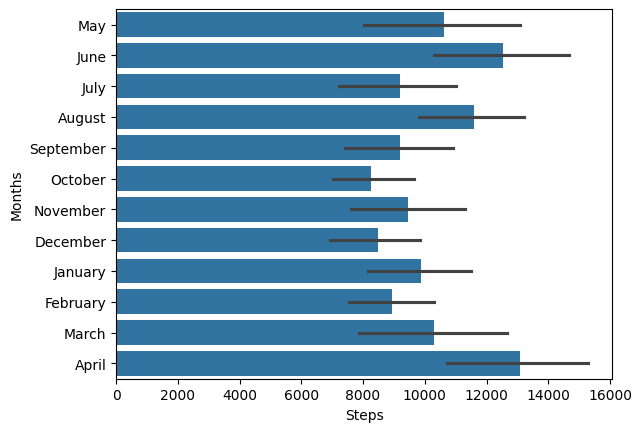

In [116]:
average_steps = sns.barplot(x="Steps", y="Months", data=fitbit) # default average

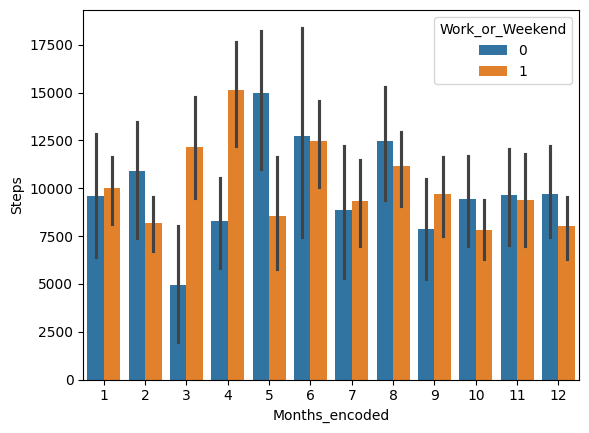

In [117]:
months_days = sns.barplot(x="Months_encoded", hue="Work_or_Weekend", y="Steps", data=fitbit);
# weekend 0
# week 1

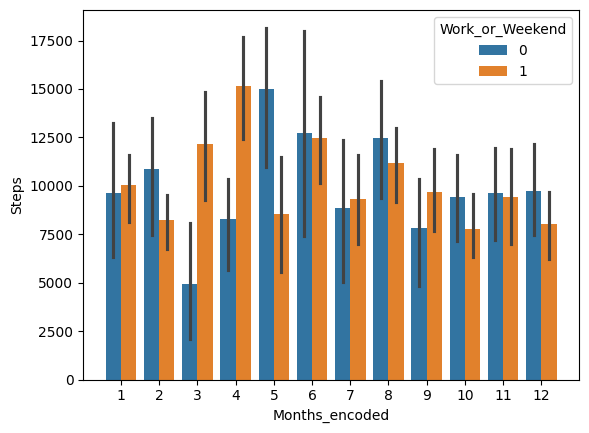

In [118]:
def number_of_steps():
    
    months_days = sns.barplot(x="Months_encoded", hue="Work_or_Weekend", y="Steps", data=fitbit);
    months_days.plot(figsize=(12,4))
    plt.xticks(rotation=0)
    plt.savefig("fitbit-steps.png")
    os.system("open fitbit-steps.png")
    
number_of_steps()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

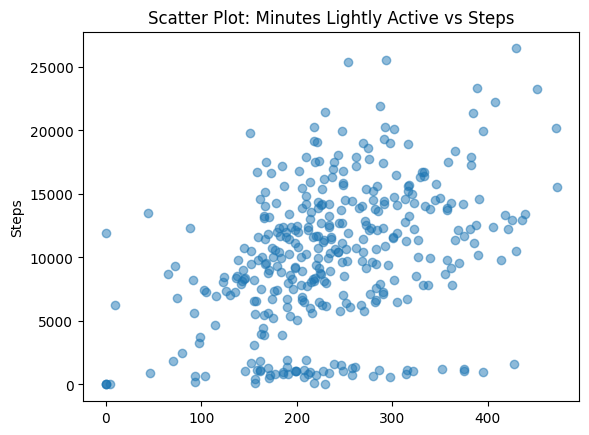

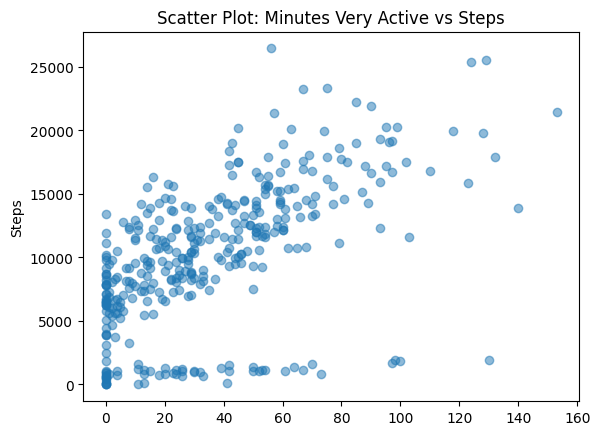

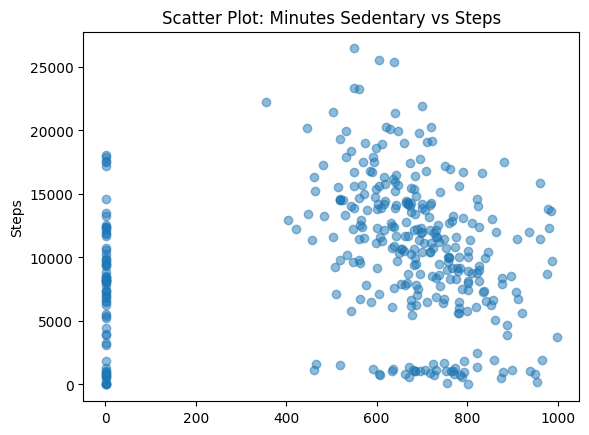

In [119]:
lst = ('Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary')
for i in lst:
    plt.figure()
    plt.scatter(x=fitbit[i], y=fitbit['Steps'], alpha=0.5)
    plt.title(f'Scatter Plot: {i} vs Steps')
    plt.ylabel('Steps')
    plt.show()